#Basketball Lineup Plus-minus Prediction 


##### Kole Laviolette 72088131 Jerry Qi 73382533 Junru Chen 74767625

## Introduction 

  In basketball, there is a statistic called the “plus-minus” (short-handed to “+/-”) that refers to the sum of all of the points scored while they were on the court, minus the sum of all the points they let the opposing team score. This statistic is a good quantifiable value for the overall effect of a line and it can be used to determine the best line for a team to play in a game.
  
  In our project, our group is trying to approximate the plus-minus of a certain line in a basketball game.

  Our dataset contains the statistics of various NBA lineups. In every row of our dataset there are record observations for the following values:
  
TEAM (team names), GP (total games played), and average MIN (minutes played), PTS (points scored), FGM (field goals made), FGA (field goals attempted), FG% (hit rate of all shots), 3PM (number of 3-point shots made), 3PA (number of 3-point shots attempted), 3P% (hit rate of 3-point shots), FTM (number of free throws made), FTA (number of free throws attempted), FT% (hit rate of free throws), OREB (number of offensive rebounds), DREB (number of defensive rebounds), REB (total number of rebounds), AST (number of assists), TOV (number of turnovers), STL (times of getting the ball from opponents), BLK (times of rejecting the opponents’ shots), BLKA (number of shots rejected by opponents), PF (number of fouls), PFD (numebr of fouls by opponents), +/- (plus/minus).



## Preliminary exploratory data analysis
text

In [23]:
library(tidyverse)
library(tidymodels)
lineup_stat <- read_csv("https://raw.githubusercontent.com/JerryQi77/DSCI_Group-Project/main/DSCI_Group_project?token=GHSAT0AAAAAABZQJWZPOUAKKT7OY7UAZ33IY2546GQ")
lineup_stat

ERROR: Error in open.connection(structure(6L, class = c("curl", "connection"), conn_id = <pointer: 0x4b2>), : HTTP error 404.


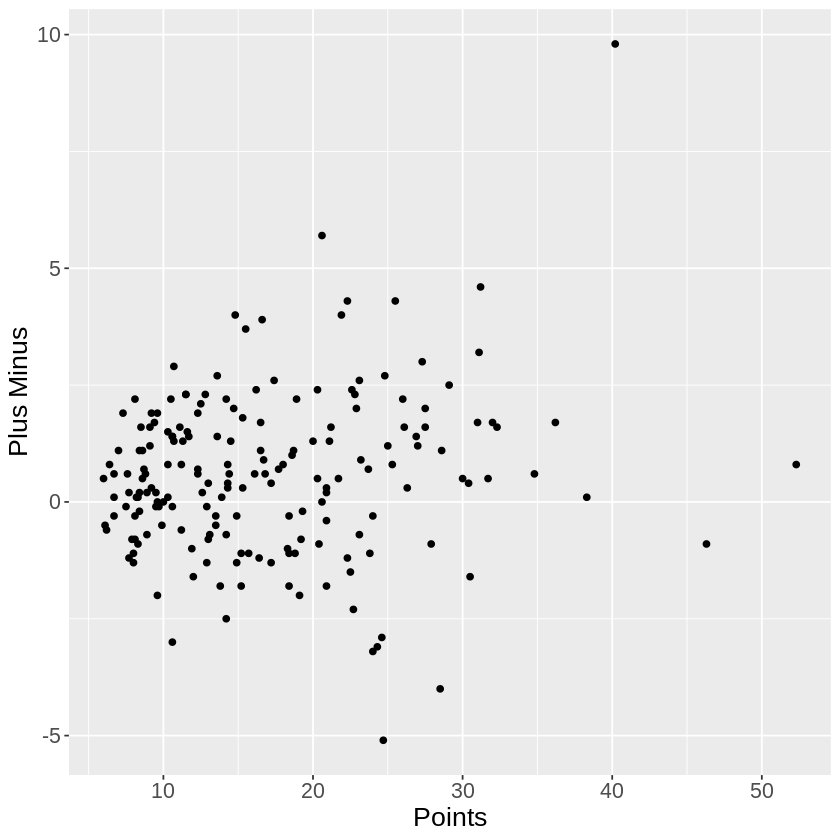

GP,MIN,PTS,FGM,FGA,FGP,3PM,3PA,3P%,FTM,⋯,TOV,STL,BLK,BLKA,PF,PFD,P_M,PIR,TSP,PPP
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19,21.6,52.3,20.4,42.3,48.2,4.3,10.9,39.6,7.3,⋯,5.2,3.6,2.2,2.4,8.0,6.9,0.8,58.5,0.5658214,1.0171931
41,21.5,46.3,17.6,37.2,47.4,3.2,9.1,35.5,7.9,⋯,6.4,3.2,2.0,2.2,7.8,8.9,-0.9,52.5,0.5564904,0.9645833
69,19.5,45.4,17.7,35.9,49.4,4.1,10.1,40.3,5.9,⋯,5.3,3.7,1.4,2.0,7.1,7.1,3.4,51.5,0.5771382,1.0172074
46,18.9,44.0,16.2,31.6,51.3,3.8,8.5,44.0,7.8,⋯,5.1,3.7,2.0,1.1,6.2,9.3,5.4,56.1,0.6051937,1.0614687
27,16.8,40.9,15.3,31.1,49.0,5.0,11.5,43.9,5.4,⋯,4.4,2.7,1.4,1.4,5.6,7.1,2.2,47.7,0.5975339,1.0589271
47,16.7,36.2,13.3,29.4,45.1,3.3,9.3,35.3,6.3,⋯,4.1,3.1,1.6,2.2,4.6,6.4,1.7,42.5,0.5512914,0.9801798
7,16.4,38.3,14.4,29.9,48.3,2.7,7.9,34.5,6.7,⋯,4.6,2.6,0.7,1.9,8.4,6.9,0.1,37.4,0.5626396,0.9913034
38,15.7,34.8,13.3,27.0,49.5,2.2,5.8,38.2,5.9,⋯,4.6,2.2,1.4,1.5,5.3,6.2,0.6,40.7,0.5776125,1.0021887
12,15.1,40.2,14.5,27.7,52.4,5.2,10.6,48.8,6.0,⋯,4.5,3.5,1.5,1.4,3.5,6.4,9.8,50.7,0.6456379,1.1281994


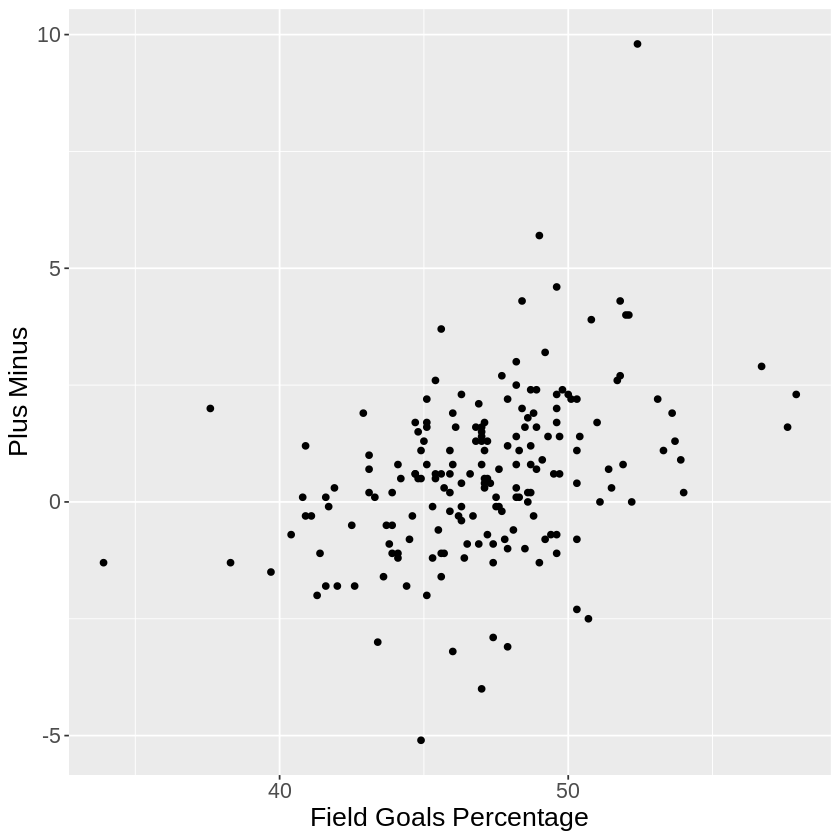

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'TSP' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. paste(capture.output(print(obj

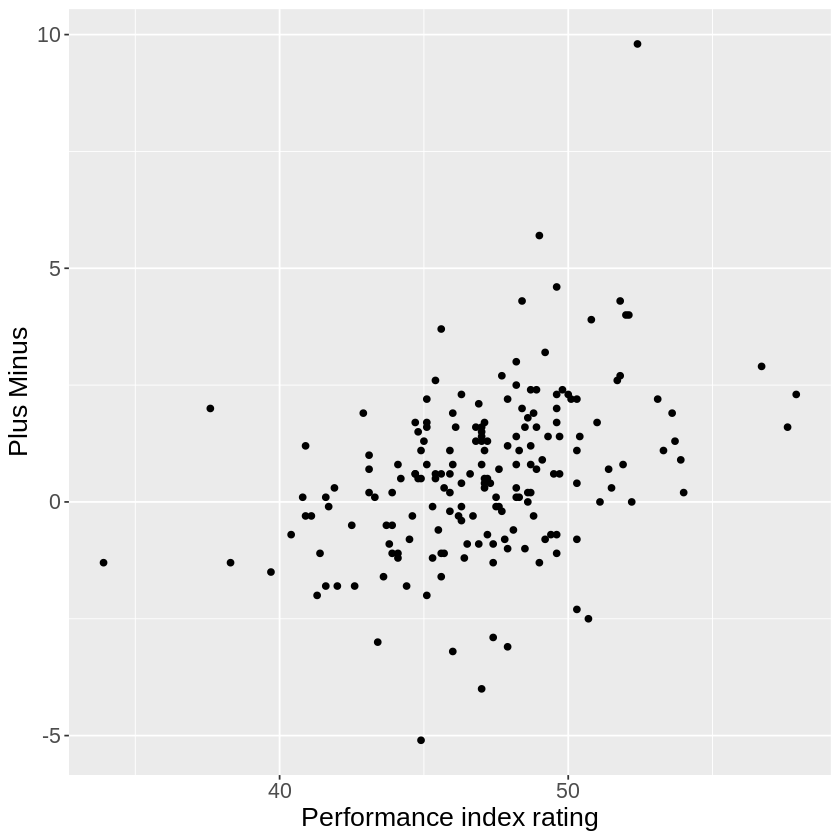

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'PPP' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. paste(capture.output(print(obj

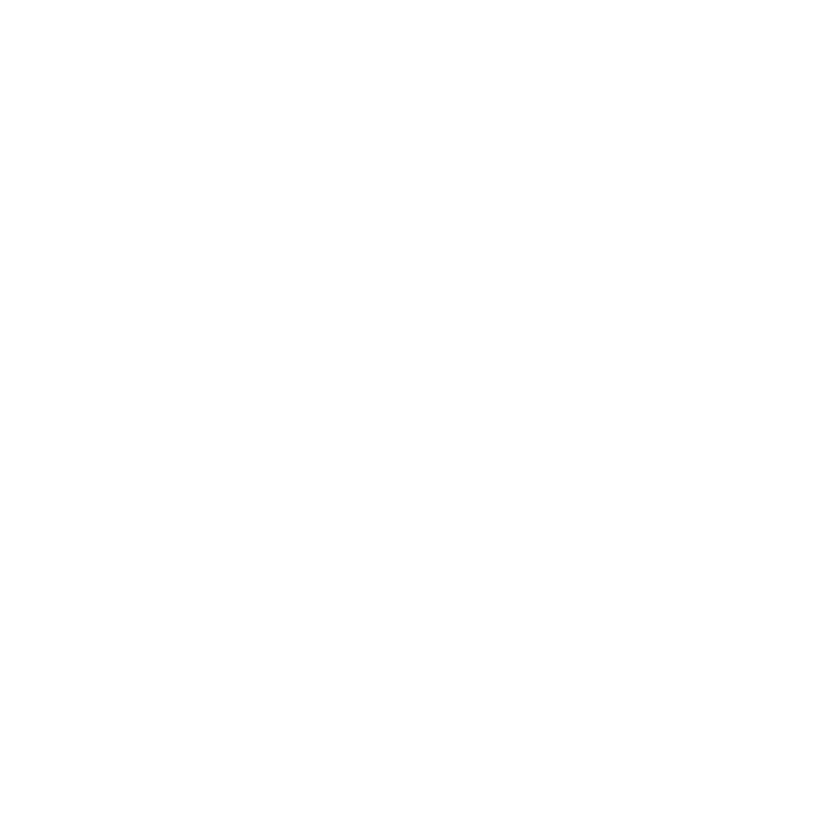

In [21]:
colnames(lineup_stat)[colnames(lineup_stat) == "+/-"] <- "P_M"
colnames(lineup_stat)[colnames(lineup_stat) == "FG%"] <- "FGP"
lineup_stat <- select(lineup_stat, GP:P_M)

lineup_split <- initial_split(lineup_stat, prop = 0.75, strata = P_M)
lineup_train <- training(lineup_split)
lineup_test <- testing(lineup_split)

pts_plot <- ggplot(lineup_train, aes(x = PTS, y = P_M)) + geom_point() +
            xlab("Points") + ylab("Plus Minus") + theme(text = element_text(size=16))
pts_plot

fgp_plot <- ggplot(lineup_train, aes(x = FGP, y = P_M)) + geom_point() +
            xlab("Field Goals Percentage") + ylab("Plus Minus") + theme(text = element_text(size=16))
fgp_plot

lineup_stat <- lineup_stat |>
                 mutate(PIR = PTS + REB + AST + STL + BLK + PFD + FGM - FGA + FTM - FTA - TOV - BLKA - PF) |>
                 mutate(TSP = PTS / ((2 * FGA) + (0.88 * FTA))) |>
                 mutate(PPP = PTS / (FGA + (0.44 * FTA) + TOV))
lineup_stat

pir_plot <- ggplot(lineup_train, aes(x = FGP, y = P_M)) + geom_point() +
            xlab("Performance index rating") + ylab("Plus Minus") + theme(text = element_text(size=16))
pir_plot

tsp_plot <- ggplot(lineup_train, aes(x = TSP, y = P_M)) + geom_point() +
            xlab("True Shooting Percentage") + ylab("Plus Minus") + theme(text = element_text(size=16))
tsp_plot

tsp_plot <- ggplot(lineup_train, aes(x = PPP, y = P_M)) + geom_point() +
            xlab("Points per possession") + ylab("Plus Minus") + theme(text = element_text(size=16))
tsp_plot

## Methods


## Expected outcomes and significance: